# Machine Learning

In [1]:
import pandas as pd
df = pd.read_csv('final_hdb_details.csv')

In [2]:
print(df.head(5))

                                       property_link  \
0  https://www.99.co/singapore/rent/property/684-...   
1  https://www.99.co/singapore/rent/property/417-...   
2  https://www.99.co/singapore/rent/property/193-...   
3  https://www.99.co/singapore/rent/property/90a-...   
4  https://www.99.co/singapore/rent/property/837-...   

                                                name  beds  baths  size  \
0   3 Room (3S) HDB for Rent in 684 Hougang Avenue 8     2      2   721   
1      5 Room (5I) HDB for Rent in 417 Canberra Road     3      2  1184   
2   5 Room (5I) HDB for Rent in 193 Edgefield Plains     3      2  1183   
3  3 Room HDB for Rent in 90A Telok Blangah Stree...     3      2  1001   
4  4 Room (4A) HDB for Rent in 837 Jurong West St...     3      2  1180   

   price_per_sqft floor_level furnishing  built_year property_type  \
0            3.88         Low    Partial         NaN   HDB 3 Rooms   
1            2.96        High      Fully         NaN   HDB 5 Rooms   
2 

In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialise LabelEncoder
label_encoder = LabelEncoder()

# Columns that require Label Encoding
columns_to_encode = ['floor_level', 'furnishing', 'property_type']

# Label Encoding for each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

print(df.head())

                                       property_link  \
0  https://www.99.co/singapore/rent/property/684-...   
1  https://www.99.co/singapore/rent/property/417-...   
2  https://www.99.co/singapore/rent/property/193-...   
3  https://www.99.co/singapore/rent/property/90a-...   
4  https://www.99.co/singapore/rent/property/837-...   

                                                name  beds  baths  size  \
0   3 Room (3S) HDB for Rent in 684 Hougang Avenue 8     2      2   721   
1      5 Room (5I) HDB for Rent in 417 Canberra Road     3      2  1184   
2   5 Room (5I) HDB for Rent in 193 Edgefield Plains     3      2  1183   
3  3 Room HDB for Rent in 90A Telok Blangah Stree...     3      2  1001   
4  4 Room (4A) HDB for Rent in 837 Jurong West St...     3      2  1180   

   price_per_sqft  floor_level  furnishing  built_year  property_type  \
0            3.88            2           1         NaN              2   
1            2.96            1           0         NaN            

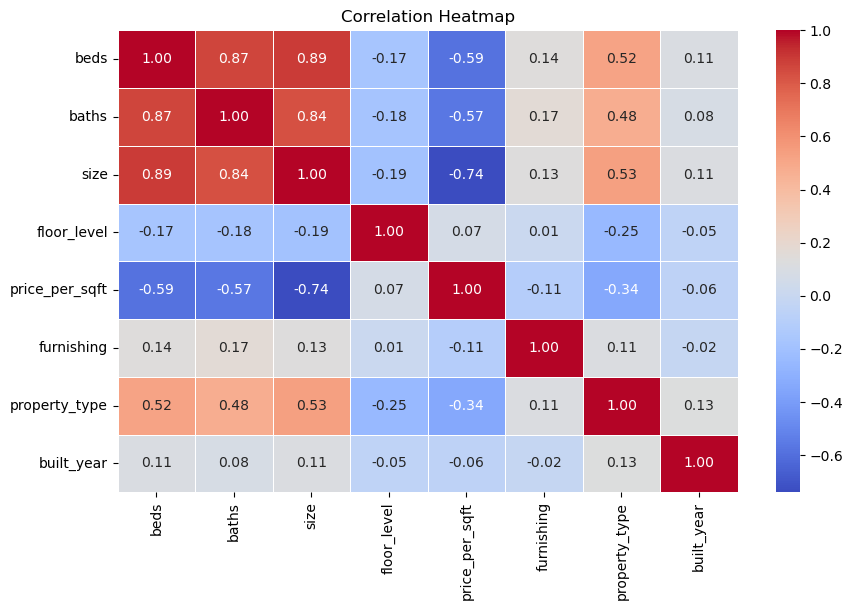

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df = df[['beds', 'baths', 'size', 'floor_level', 'price_per_sqft', 'furnishing', 'property_type', 'built_year']]

df.dropna(inplace=True)

# Select a numeric column
numeric_cols = ['size', 'price_per_sqft']

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from a list of values using the IQR method
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

numeric_cols = ['size']

# Use Min-Max normalisation to compress the value column to [0, 1]
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

output_file = 'processed_hdb_details.xlsx'
df.to_excel(output_file, index=False)

# Redraw the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [5]:
df = pd.read_csv('final_hdb_details.csv')

df = df[['beds', 'baths', 'size', 'price_per_sqft', 'furnishing', 'property_type']]

df.dropna(inplace=True)

label_encoder = LabelEncoder()
columns_to_encode = [ 'furnishing', 'property_type']
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

print(df.head())

numeric_cols = ['size', 'price_per_sqft']
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

numeric_cols = ['size']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

   beds  baths  size  price_per_sqft  furnishing  property_type
0     2      2   721            3.88           1              2
1     3      2  1184            2.96           0              4
2     3      2  1183            2.96           0              4
3     3      2  1001            4.50           0              2
4     3      2  1180            2.80           0              3


## 1. Linear regression model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selection of independent and target variables
X = df[['beds', 'baths', 'size', 'property_type','furnishing']]
y = df['price_per_sqft']

#X = df.drop(columns=['price_per_sqft'])
#y = df['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R²:", r2)

MSE: 2.749901109354599
R²: 0.5659532127400995


In [8]:
# Displays a comparison of predicted and actual values for the test set
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Error'] = abs(results['Actual'] - results['Predicted'])
print(results.head())

print('--------------------------------------')

# Outputting data with large errors
results['Error'] = abs(results['Actual'] - results['Predicted'])
print("Data points with large errors (first 5 rows):")
print(results.sort_values(by='Error', ascending=False).head())

      Actual  Predicted     Error
1991    3.60   4.133319  0.533319
569     2.91   0.638185  2.271815
4639    2.80   6.447443  3.647443
6518    8.17   7.252982  0.917018
6374    4.75   6.792602  2.042602
--------------------------------------
Data points with large errors (first 5 rows):
      Actual  Predicted     Error
3428   13.12   7.074710  6.045290
3712   13.18   7.310530  5.869470
4299   13.33   7.540845  5.789155
4618   13.00   7.310655  5.689345
5774   13.00   7.310655  5.689345


## 2. SVM

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def categorize_price(price):
    if price < 4:
        return 0  # Low price
    elif 4 <= price <= 7:
        return 1  # Median price
    else:
        return 2  # High price

df['price_category'] = df['price_per_sqft'].apply(categorize_price)

# Select independent and dependent variables
X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

#X = df.drop(columns=['price_category'])
#y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with scaling and SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly', C=100, gamma='auto', random_state=42)) 
])

svm_pipeline.fit(X_train, y_train)

y_pred = svm_pipeline.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7863304578633046

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       554
           1       0.70      0.79      0.74       581
           2       0.79      0.73      0.76       372

    accuracy                           0.79      1507
   macro avg       0.79      0.78      0.79      1507
weighted avg       0.79      0.79      0.79      1507


Confusion Matrix:
 [[456  96   2]
 [ 53 457  71]
 [  0 100 272]]


## 3. Logistic regression model

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

#X = df.drop(columns=['price_category'])
#y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# standardise data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a multi-classification logistic regression model, increase max_iter and adjust solver
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7836761778367618

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       554
           1       0.72      0.73      0.72       581
           2       0.78      0.78      0.78       372

    accuracy                           0.78      1507
   macro avg       0.79      0.78      0.78      1507
weighted avg       0.78      0.78      0.78      1507


Confusion Matrix:
 [[464  87   3]
 [ 75 425  81]
 [  0  80 292]]


## 4. Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

#X = df.drop(columns=['price_category'])
#y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a decision tree model
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

In [14]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8029197080291971

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       554
           1       0.77      0.70      0.74       581
           2       0.79      0.77      0.78       372

    accuracy                           0.80      1507
   macro avg       0.80      0.80      0.80      1507
weighted avg       0.80      0.80      0.80      1507


Confusion Matrix:
 [[515  36   3]
 [100 408  73]
 [  2  83 287]]


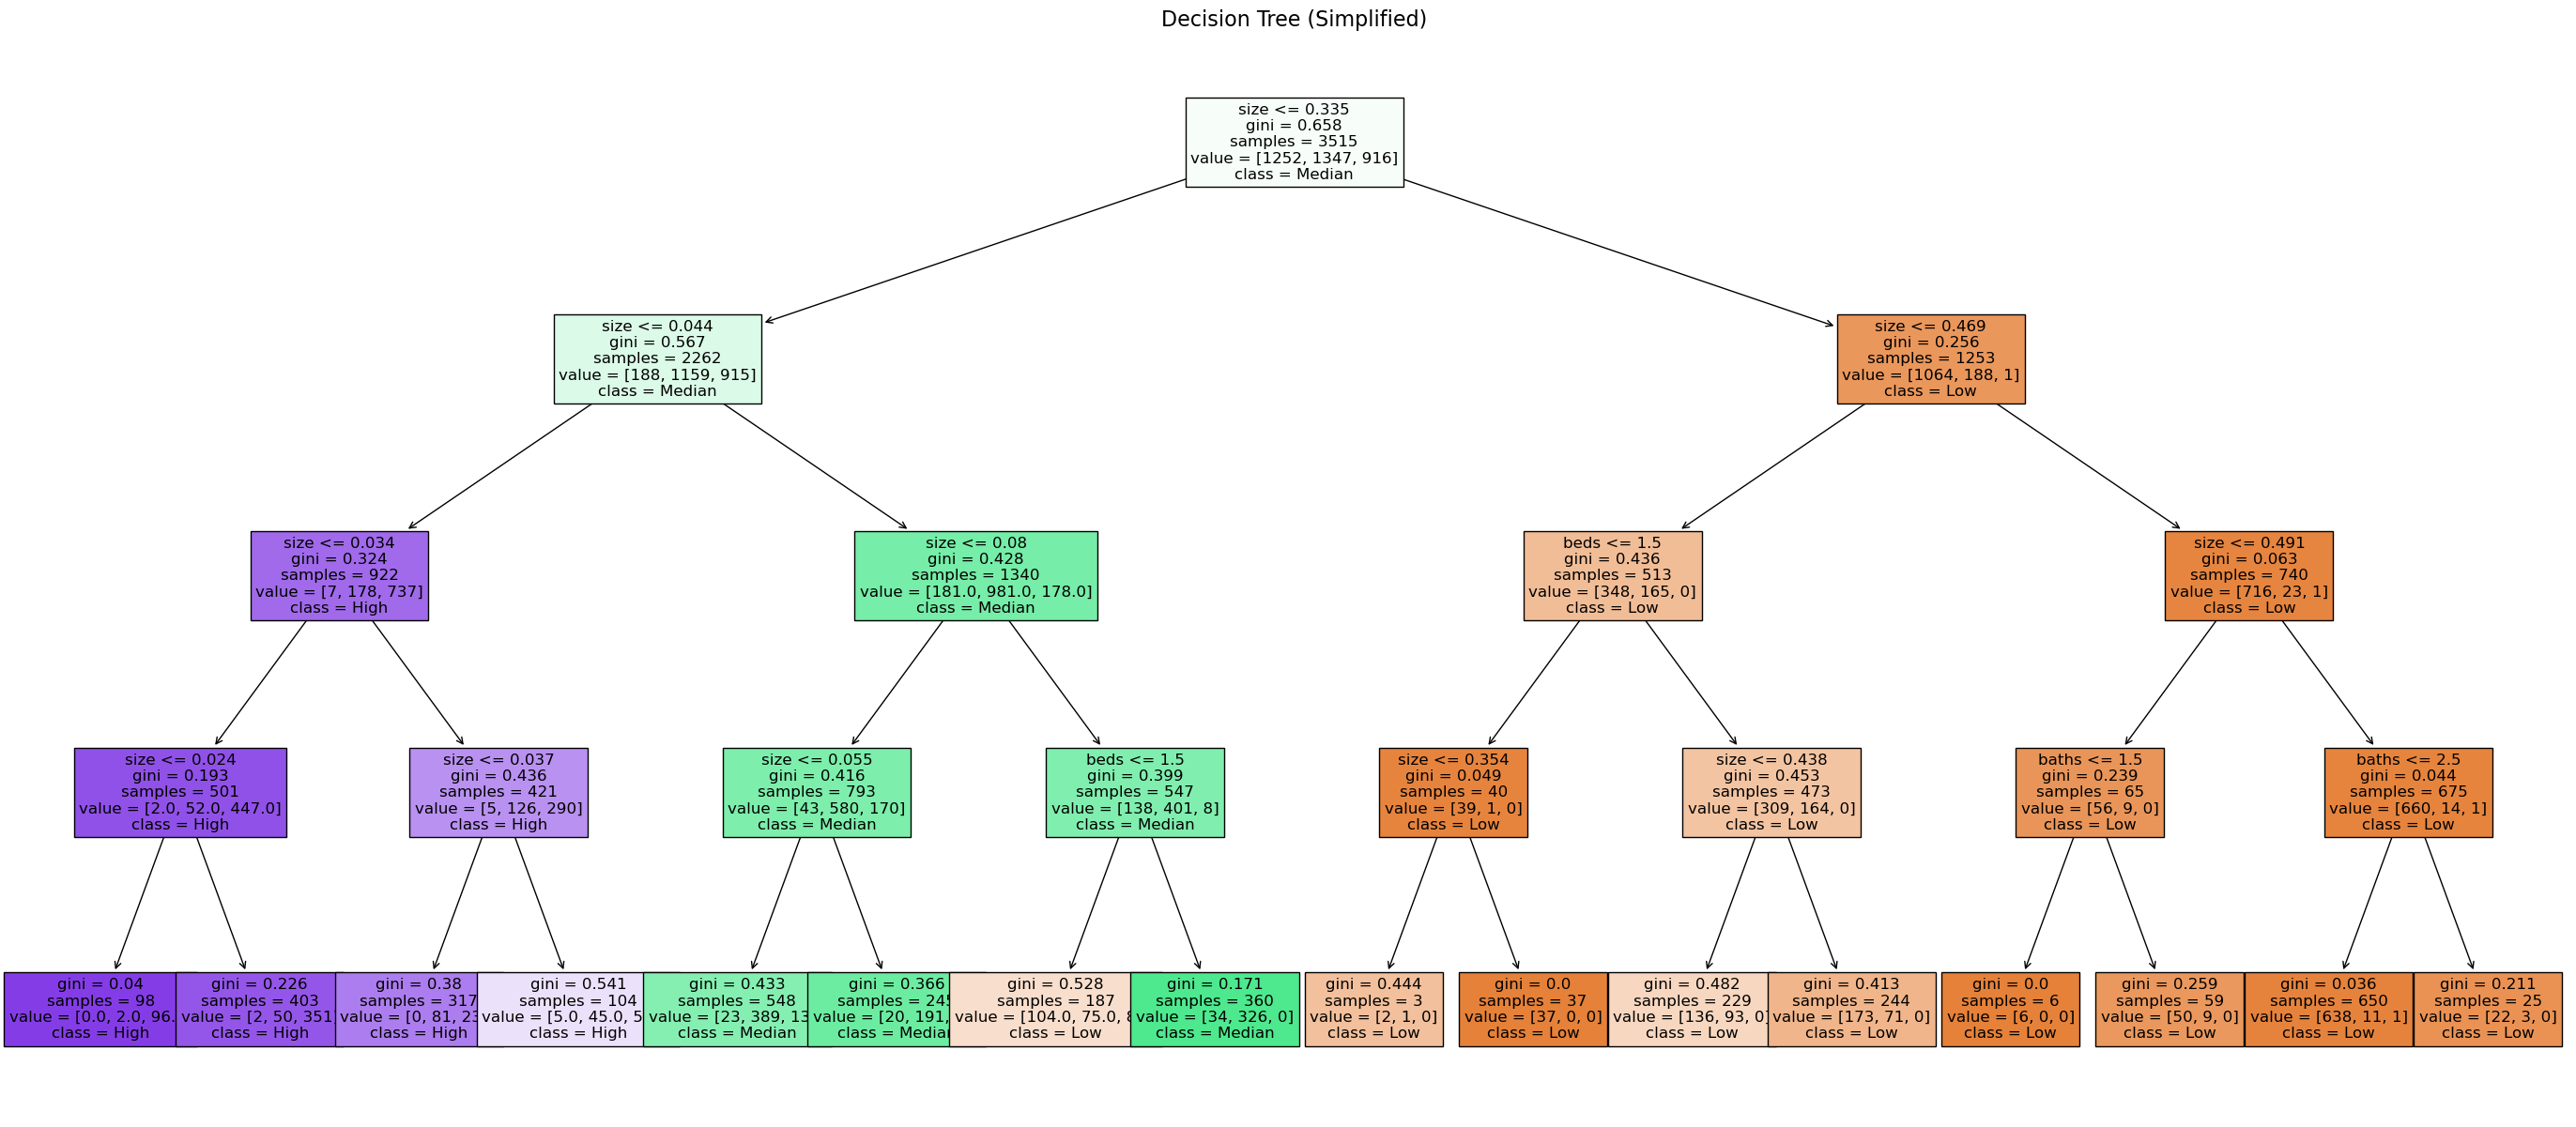

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(35, 15))
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=['Low', 'Median', 'High'],
    filled=True,
    fontsize=12,
    max_depth=4
)
plt.title('Decision Tree (Simplified)', fontsize=16)
plt.show()

## 5. Random Forest

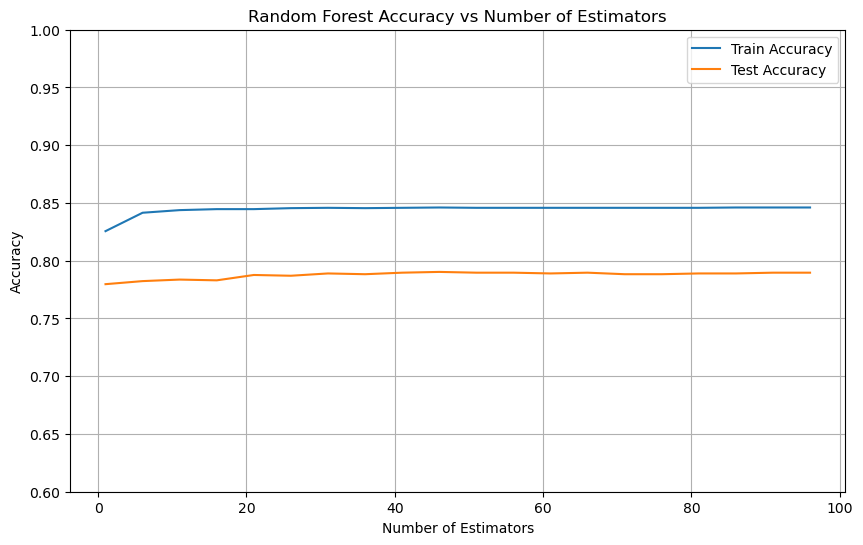

In [16]:
from sklearn.ensemble import RandomForestClassifier

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

#X = df.drop(columns=['price_category'])
#y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_scores = []
test_scores = []

rf = RandomForestClassifier(random_state=42)

# Set the range of estimators (number of trees)
estimator_range = range(1, 100, 5)

# Iterate through different numbers of estimators
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(estimator_range, train_scores, label="Train Accuracy")
plt.plot(estimator_range, test_scores, label="Test Accuracy")
plt.ylim(0.6, 1)
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.title("Random Forest Accuracy vs Number of Estimators")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
optimal_n_estimators = estimator_range[test_scores.index(max(test_scores))]
print(f"Optimal number of estimators: {optimal_n_estimators}")

rf_final = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=42)
rf_final.fit(X_train, y_train)

y_pred = rf_final.predict(X_test)

Optimal number of estimators: 46


In [18]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final Model Accuracy: 0.7903118779031187

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       554
           1       0.71      0.77      0.74       581
           2       0.79      0.74      0.77       372

    accuracy                           0.79      1507
   macro avg       0.80      0.79      0.79      1507
weighted avg       0.79      0.79      0.79      1507


Confusion Matrix:
 [[464  88   2]
 [ 60 450  71]
 [  3  92 277]]


## 6. XGBoost

In [19]:
from xgboost import XGBClassifier

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

#X = df.drop(columns=['price_category'])
#y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=650,
    max_depth=5,
    learning_rate=0.01,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

C:\Users\hengt\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:08:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [20]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8128732581287326

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       554
           1       0.76      0.75      0.76       581
           2       0.81      0.77      0.79       372

    accuracy                           0.81      1507
   macro avg       0.81      0.81      0.81      1507
weighted avg       0.81      0.81      0.81      1507


Confusion Matrix:
 [[502  51   1]
 [ 77 438  66]
 [  1  86 285]]


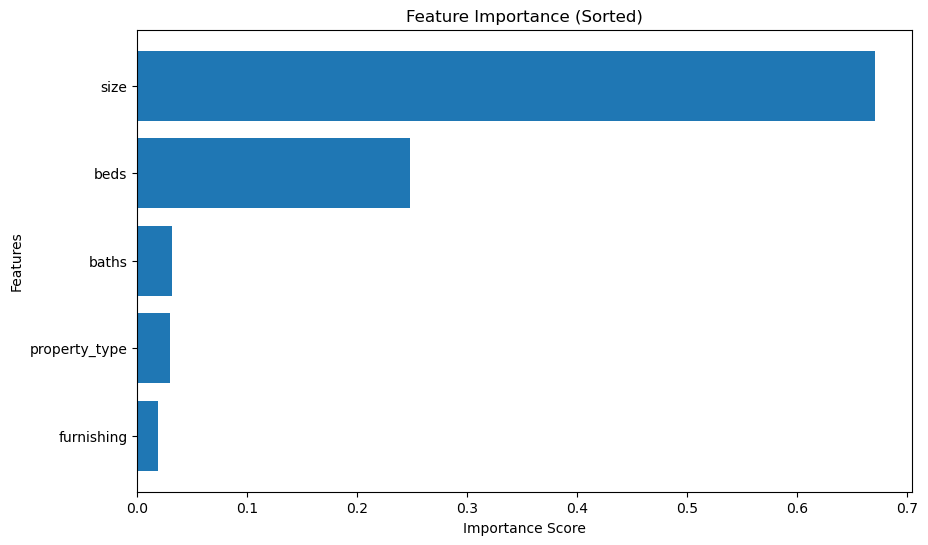

In [21]:
# Get feature importance
feature_importances = xgb_model.feature_importances_
features = X.columns

# Create DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance (Sorted)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

## 7. Ada-Boost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

#X = df.drop(columns=['price_category'])
#y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=800,
    learning_rate=0.1,
    random_state=42
)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

C:\Users\hengt\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [23]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7140013271400133

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.79       554
           1       0.67      0.51      0.58       581
           2       0.78      0.77      0.78       372

    accuracy                           0.71      1507
   macro avg       0.72      0.72      0.71      1507
weighted avg       0.71      0.71      0.70      1507


Confusion Matrix:
 [[494  58   2]
 [208 296  77]
 [  0  86 286]]


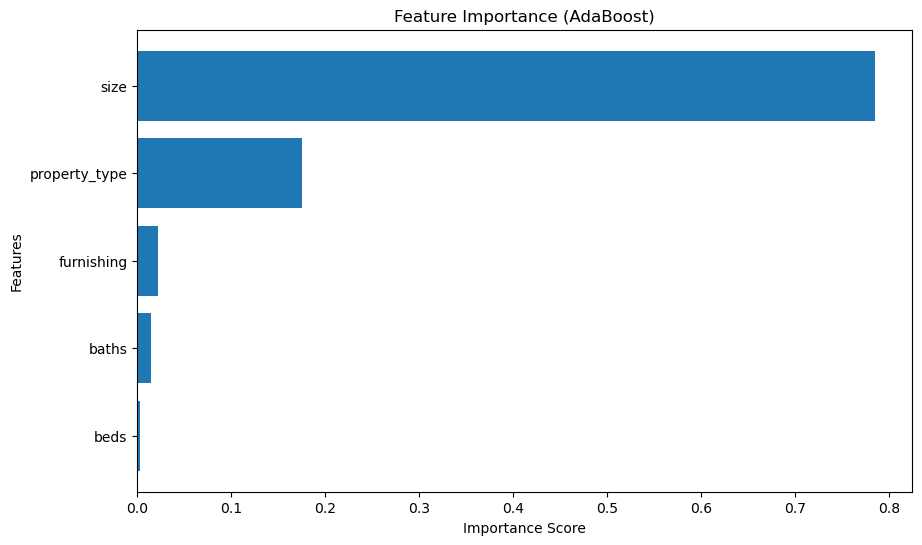

In [24]:
# Feature importance visualization
feature_importances = ada_model.feature_importances_
features = X.columns

# Create DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance (AdaBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Flip the Y axis so that the features of high importance are at the top.
plt.show()

## 8. Gradient Boosted Decision Trees

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

#X = df.drop(columns=['price_category'])
#y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosted Decision Trees classifier
gbdt_model = GradientBoostingClassifier(
    n_estimators=800,
    learning_rate=0.01,
    max_depth=4,
    random_state=42
)

gbdt_model.fit(X_train, y_train)
y_pred = gbdt_model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8035832780358327

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       554
           1       0.74      0.76      0.75       581
           2       0.81      0.73      0.77       372

    accuracy                           0.80      1507
   macro avg       0.81      0.80      0.80      1507
weighted avg       0.80      0.80      0.80      1507


Confusion Matrix:
 [[497  56   1]
 [ 75 443  63]
 [  2  99 271]]


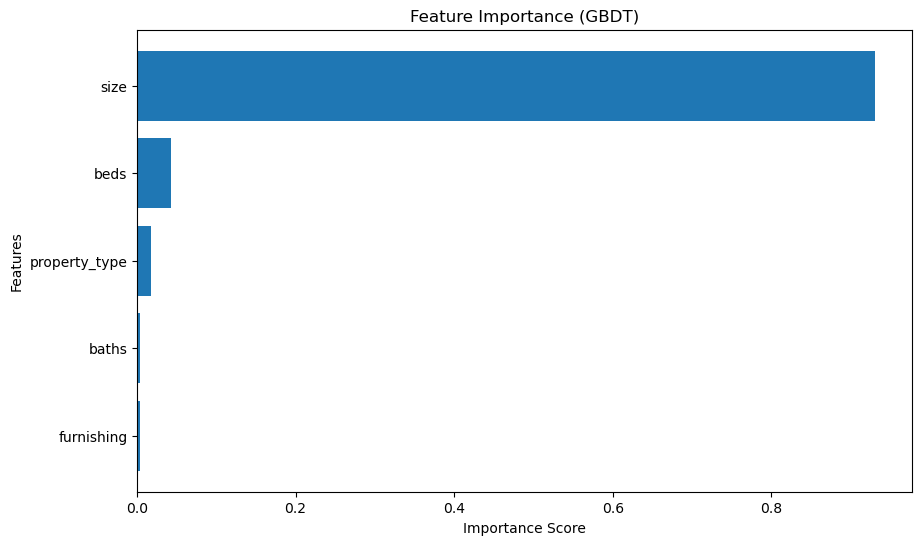

In [27]:
feature_importances = gbdt_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance (GBDT)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Flip the Y axis so that the features of high importance are at the top.
plt.show()

## Logistic_Regression+Random_Forest+SVM

In [28]:
from mlxtend.classifier import StackingClassifier

# Define base models
clf1 = LogisticRegression(random_state=42, solver='lbfgs', max_iter=500)
clf2 = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=42)
clf3 = SVC(kernel='poly', C=100, gamma='auto', probability=True, random_state=42)

# Meta-classifier
meta_clf = LogisticRegression(random_state=42, solver='lbfgs', max_iter=500)

# Stacking Classifier
stack_clf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=meta_clf)

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

stack_clf.fit(X_train, y_train)
y_pred = stack_clf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of Stacking Classifier:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy of Stacking Classifier: 0.7903118779031187

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       554
           1       0.71      0.77      0.74       581
           2       0.79      0.74      0.77       372

    accuracy                           0.79      1507
   macro avg       0.80      0.79      0.79      1507
weighted avg       0.79      0.79      0.79      1507


Confusion Matrix:
 [[464  88   2]
 [ 60 450  71]
 [  3  92 277]]


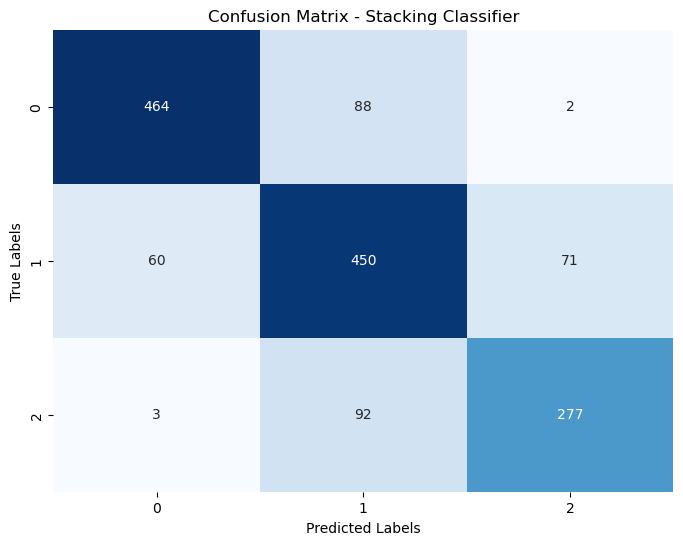

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Confusion Matrix - Stacking Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Logistic_Regression+Random_Forest+Decision_Tree

In [31]:
clf1 = LogisticRegression(random_state=42, solver='lbfgs', max_iter=500)
clf2 = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=42)
clf3 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

meta_clf = LogisticRegression(random_state=42, solver='lbfgs', max_iter=500)

stack_clf = StackingClassifier(
    classifiers=[clf1, clf2, clf3],
    meta_classifier=meta_clf,
    use_probas=True,
    average_probas=False
)

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

stack_clf.fit(X_train, y_train)
y_pred = stack_clf.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("\nStacking Classifier Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Stacking Classifier Accuracy: 0.7869940278699403

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86       554
           1       0.70      0.79      0.74       581
           2       0.80      0.72      0.76       372

    accuracy                           0.79      1507
   macro avg       0.80      0.78      0.79      1507
weighted avg       0.79      0.79      0.79      1507


Confusion Matrix:
 [[460  92   2]
 [ 58 457  66]
 [  3 100 269]]


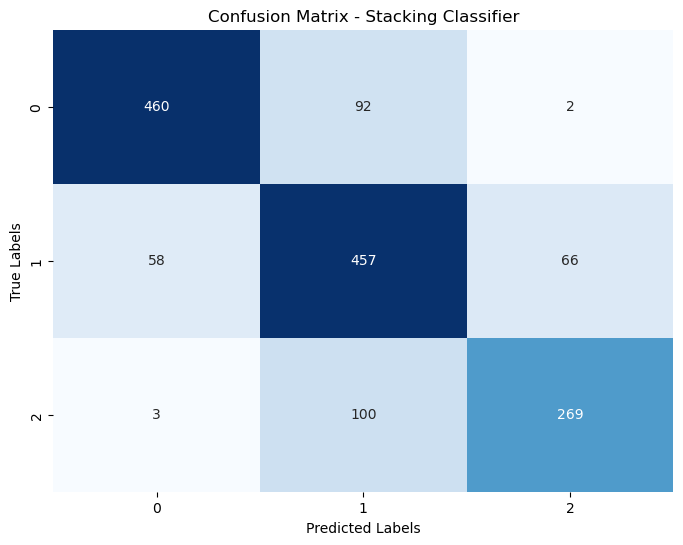

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Confusion Matrix - Stacking Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## AdaBoost+Logistic_Regression+SVM

In [34]:
clf1 = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=800,
    learning_rate=0.1,
    random_state=42
)
clf2 = LogisticRegression(random_state=42, solver='lbfgs', max_iter=500)
clf3 = SVC(kernel='poly', C=100, gamma='auto', probability=True, random_state=42)

meta_clf = LogisticRegression(random_state=42, solver='lbfgs', max_iter=500)

stack_clf = StackingClassifier(
    classifiers=[clf1, clf2, clf3],
    meta_classifier=meta_clf,
    use_probas=True,
    average_probas=False
)

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

stack_clf.fit(X_train, y_train)
y_pred = stack_clf.predict(X_test)

C:\Users\hengt\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("\nStacking Classifier Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Stacking Classifier Accuracy: 0.7896483078964831

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       554
           1       0.71      0.77      0.74       581
           2       0.77      0.78      0.78       372

    accuracy                           0.79      1507
   macro avg       0.79      0.79      0.79      1507
weighted avg       0.80      0.79      0.79      1507


Confusion Matrix:
 [[452 100   2]
 [ 51 446  84]
 [  0  80 292]]


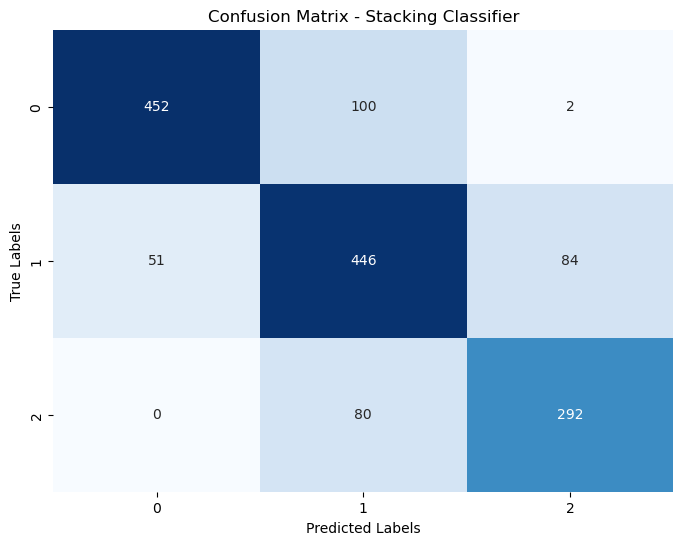

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Confusion Matrix - Stacking Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## XGBoost+GBDT+Decision_Tree

In [37]:
clf1 = XGBClassifier(
    n_estimators=650,
    max_depth=5,
    learning_rate=0.01,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
clf2 = GradientBoostingClassifier(
    n_estimators=800,
    learning_rate=0.01,
    max_depth=4,
    random_state=42
) 
clf3 = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
) 

meta_clf = LogisticRegression(random_state=42, solver='lbfgs', max_iter=500)

stack_clf = StackingClassifier(
    classifiers=[clf1, clf2, clf3],
    meta_classifier=meta_clf,
    use_probas=True, 
    average_probas=False
)

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

stack_clf.fit(X_train, y_train)
y_pred = stack_clf.predict(X_test)

C:\Users\hengt\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("\nStacking Classifier Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Stacking Classifier Accuracy: 0.8022561380225613

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       554
           1       0.72      0.80      0.76       581
           2       0.83      0.71      0.77       372

    accuracy                           0.80      1507
   macro avg       0.81      0.79      0.80      1507
weighted avg       0.81      0.80      0.80      1507


Confusion Matrix:
 [[483  70   1]
 [ 66 462  53]
 [  2 106 264]]


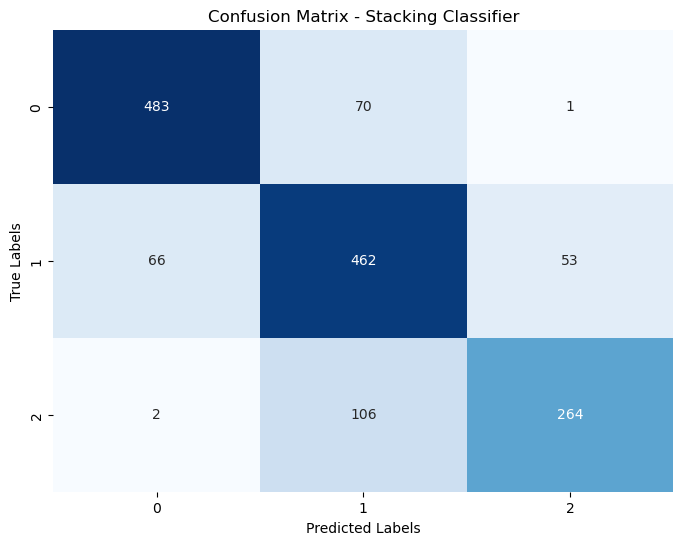

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Confusion Matrix - Stacking Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Performance for Machine Learning Models

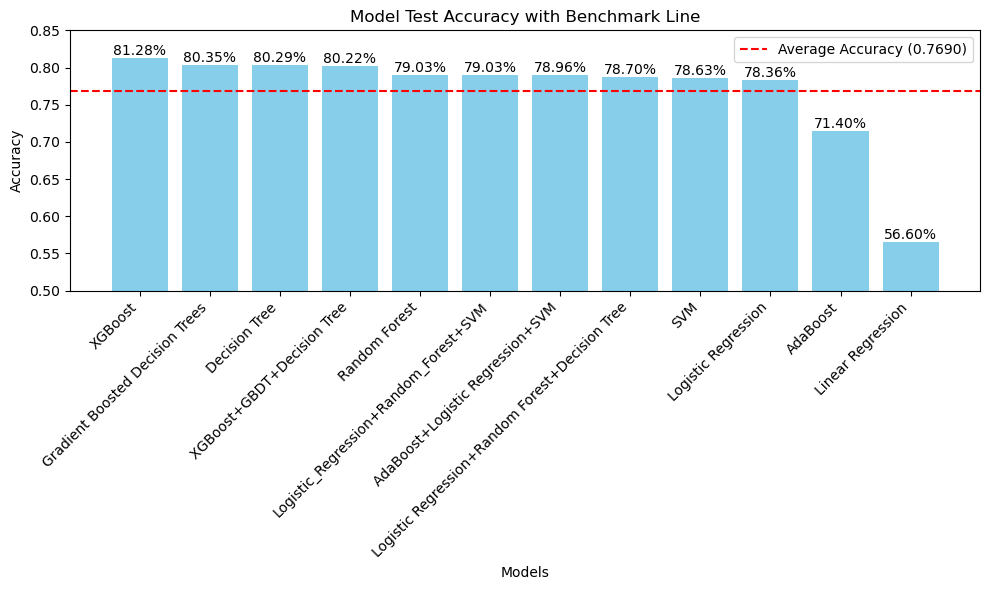

In [40]:
# Model name and corresponding test accuracy
models = [
    ("Linear Regression", 0.5660),
    ("Logistic Regression", 0.7836),
    ("SVM", 0.7863),
    ("Random Forest", 0.7903),
    ("AdaBoost", 0.7140),
    ("Decision Tree", 0.8029),
    ("XGBoost", 0.8128),
    ("Gradient Boosted Decision Trees", 0.8035),
    ("Logistic_Regression+Random_Forest+SVM", 0.7903),
    ("Logistic Regression+Random Forest+Decision Tree", 0.7870),
    ("AdaBoost+Logistic Regression+SVM", 0.7896),
    ("XGBoost+GBDT+Decision Tree", 0.8022),
]

# Sort by descending accuracy
models_sorted = sorted(models, key=lambda x: x[1], reverse=True)
model_names, accuracies = zip(*models_sorted)

average_accuracy = np.mean(accuracies)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')

# Add percentages on top of bars
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{accuracy * 100:.2f}%", 
             ha='center', va='bottom', fontsize=10)

plt.axhline(y=average_accuracy, color='red', linestyle='--', label=f"Average Accuracy ({average_accuracy:.4f})")

plt.ylim(0.5, 0.85)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Test Accuracy with Benchmark Line")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# Deep Learning

## 9. MLP

In [41]:
from sklearn.neural_network import MLPRegressor

# Define input features and output variable
#X = df.drop(columns=['price_category'])
#y = df['price_category']

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLP Regressor
mlp = MLPRegressor(
    hidden_layer_sizes=(200, 100, 50), 
    activation='relu', 
    solver='adam',
    max_iter=500,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMSE:", mse)
print("\nR²:", r2)


MSE: 0.1677426258679773

R²: 0.7203732625823434


## 10. RNN

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, Flatten
from tensorflow.keras.utils import to_categorical
import random
import tensorflow as tf
from sklearn.utils import shuffle

# Set random seeds
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Shuffle the dataset
X, y = shuffle(X, y, random_state=42)

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

num_classes = len(np.unique(y))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

In [44]:
model = Sequential()
model.add(SimpleRNN(256, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\hengt\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
history = model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

# assessment model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5584 - loss: 0.8239 - val_accuracy: 0.6785 - val_loss: 0.6316
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6474 - loss: 0.6484 - val_accuracy: 0.6956 - val_loss: 0.5875
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6857 - loss: 0.6072 - val_accuracy: 0.7055 - val_loss: 0.5649
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7155 - loss: 0.5820 - val_accuracy: 0.6999 - val_loss: 0.5669
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7338 - loss: 0.5674 - val_accuracy: 0.7169 - val_loss: 0.5508
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7478 - loss: 0.5532 - val_accuracy: 0.7183 - val_loss: 0.5446
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7505 - loss: 0.5434 - val_accuracy: 0.7212 - val_loss: 0.5418
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7513 - loss: 0.5360 - val_accuracy: 0.7212 - val_loss

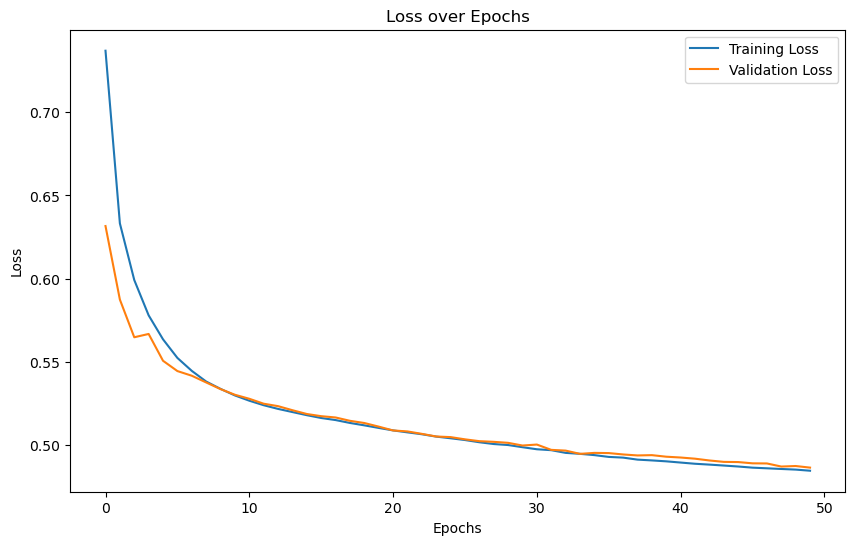

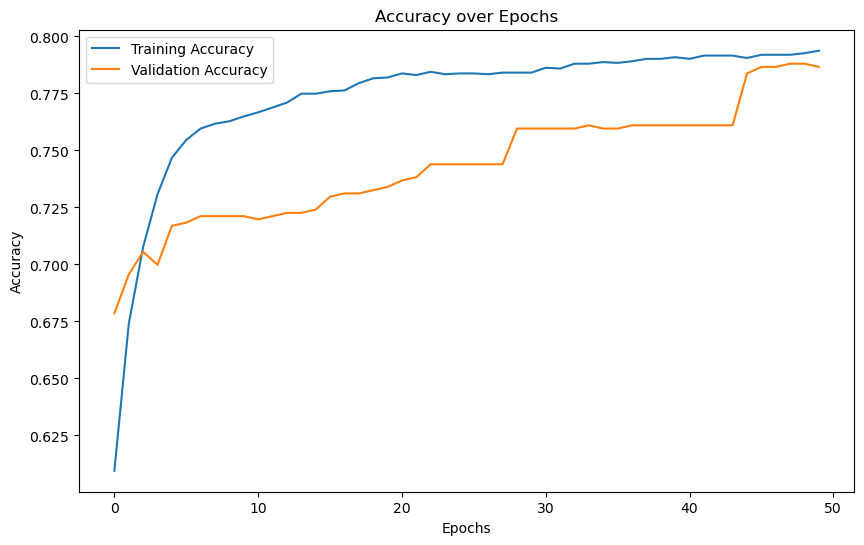

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

In [47]:
# model prediction
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classified report
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       554
           1       0.74      0.70      0.72       581
           2       0.70      0.83      0.76       372

    accuracy                           0.78      1507
   macro avg       0.78      0.79      0.78      1507
weighted avg       0.79      0.78      0.78      1507


Confusion Matrix:
 [[462  83   9]
 [ 54 406 121]
 [  0  63 309]]


## 11. GRU

In [48]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
X, y = shuffle(X, y, random_state=42)

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

num_classes = len(np.unique(y))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

In [49]:
from tensorflow.keras.layers import Dense, GRU, Flatten

model = Sequential()
model.add(GRU(256, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), activation='relu', return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/50


C:\Users\hengt\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5654 - loss: 0.8869 - val_accuracy: 0.6728 - val_loss: 0.6498
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6344 - loss: 0.6648 - val_accuracy: 0.6913 - val_loss: 0.5938
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6770 - loss: 0.6171 - val_accuracy: 0.7027 - val_loss: 0.5654
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7149 - loss: 0.5865 - val_accuracy: 0.7155 - val_loss: 0.5537
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7399 - loss: 0.5672 - val_accuracy: 0.7155 - val_loss: 0.5472
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7488 - loss: 0.5535 - val_accuracy: 0.7240 - val_loss: 0.5408
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7530 - loss: 0.5429 - val_accuracy: 0.7255 - val_loss: 0.5366
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7539 - loss: 0.5353 - val_accuracy: 0.7240 - val_loss: 0.5321

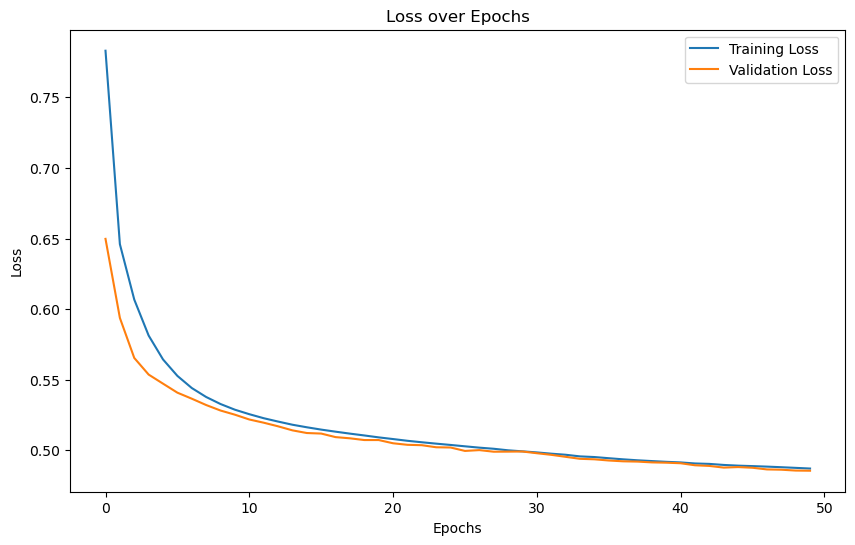

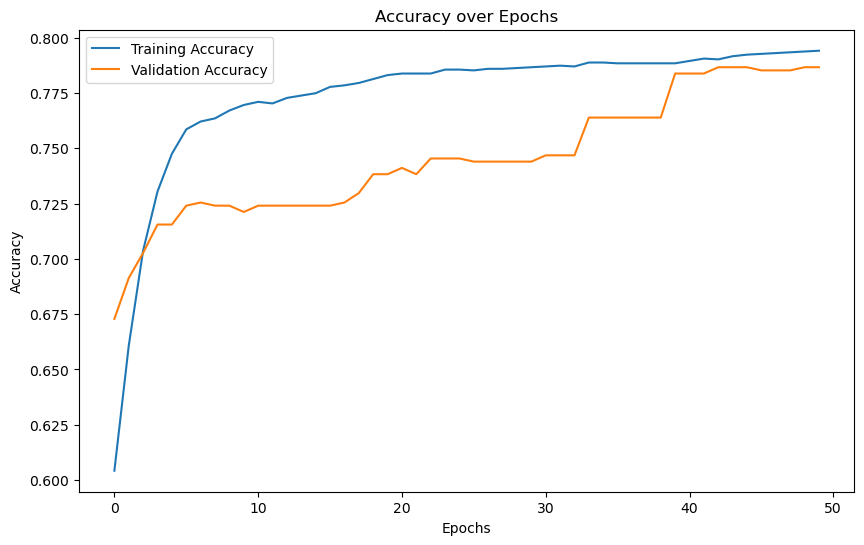

In [50]:
# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

In [51]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       554
           1       0.74      0.70      0.72       581
           2       0.70      0.83      0.76       372

    accuracy                           0.78      1507
   macro avg       0.78      0.79      0.78      1507
weighted avg       0.79      0.78      0.78      1507


Confusion Matrix:
 [[464  81   9]
 [ 54 406 121]
 [  0  63 309]]


## 12. LSTM

In [52]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
X, y = shuffle(X, y, random_state=42)

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

num_classes = len(np.unique(y))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

In [53]:
from tensorflow.keras.layers import Dense, LSTM

# Build LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), activation='tanh', return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%")

C:\Users\hengt\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5577 - loss: 0.9084 - val_accuracy: 0.6543 - val_loss: 0.6841
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6272 - loss: 0.6967 - val_accuracy: 0.6856 - val_loss: 0.6227
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6610 - loss: 0.6447 - val_accuracy: 0.7027 - val_loss: 0.5936
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6867 - loss: 0.6114 - val_accuracy: 0.7112 - val_loss: 0.5685
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7229 - loss: 0.5836 - val_accuracy: 0.7240 - val_loss: 0.5554
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7410 - loss: 0.5643 - val_accuracy: 0.7240 - val_loss: 0.5513
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7556 - loss: 0.5514 - val_accuracy: 0.7255 - val_loss: 0.5439
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7568 - loss: 0.5420 - val_accuracy: 0.7255 - val

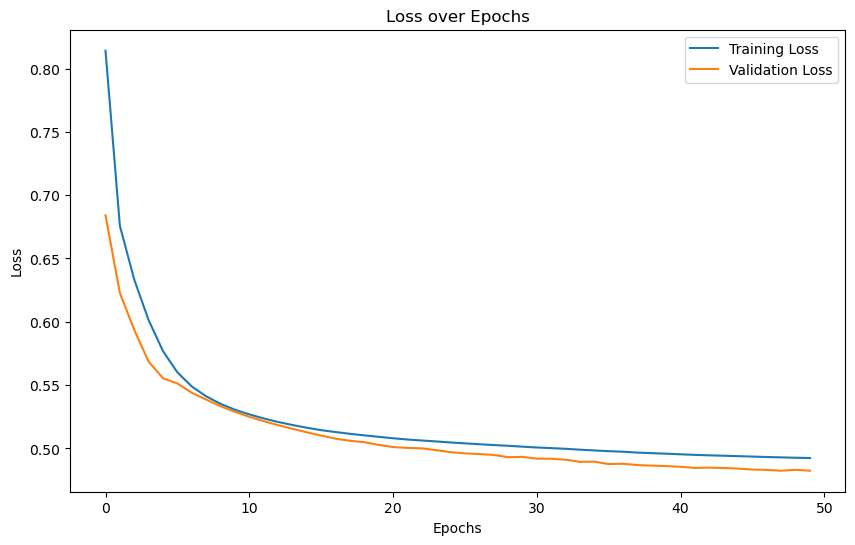

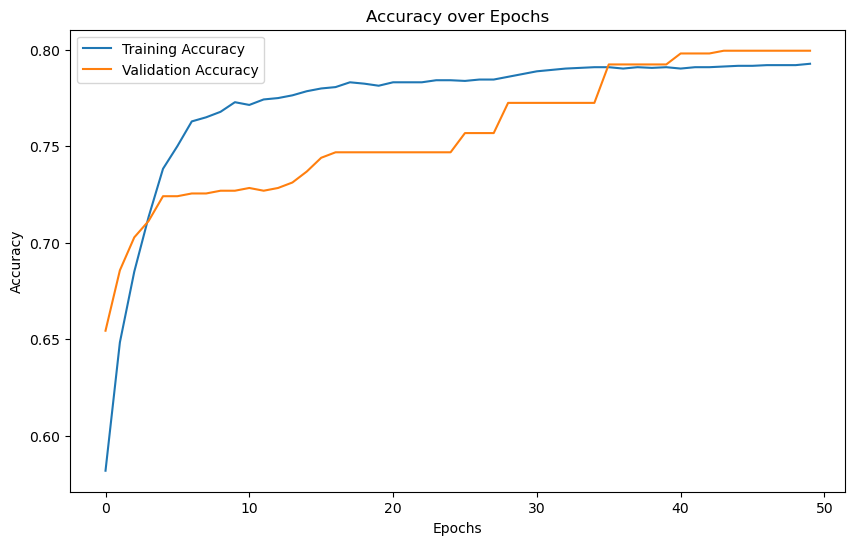

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

In [55]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       554
           1       0.72      0.77      0.74       581
           2       0.75      0.80      0.77       372

    accuracy                           0.79      1507
   macro avg       0.80      0.79      0.79      1507
weighted avg       0.80      0.79      0.80      1507


Confusion Matrix:
 [[455  95   4]
 [ 42 446  93]
 [  0  76 296]]


## 13. BiRNN

In [56]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
X, y = shuffle(X, y, random_state=42)

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

num_classes = len(np.unique(y))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

In [57]:
from tensorflow.keras.layers import Dense, Bidirectional, SimpleRNN

model = Sequential()
model.add(Bidirectional(SimpleRNN(128, activation='relu'), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%")

C:\Users\hengt\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5574 - loss: 0.8192 - val_accuracy: 0.6771 - val_loss: 0.6175
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6559 - loss: 0.6415 - val_accuracy: 0.6999 - val_loss: 0.5791
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6932 - loss: 0.6050 - val_accuracy: 0.7041 - val_loss: 0.5547
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7227 - loss: 0.5787 - val_accuracy: 0.7169 - val_loss: 0.5429
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7422 - loss: 0.5601 - val_accuracy: 0.7169 - val_loss: 0.5370
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7586 - loss: 0.5484 - val_accuracy: 0.7226 - val_loss: 0.5329
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7600 - loss: 0.5395 - val_accuracy: 0.7212 - val_loss: 0.5287
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7611 - loss: 0.5325 - val_accuracy: 0.7226 - val_loss

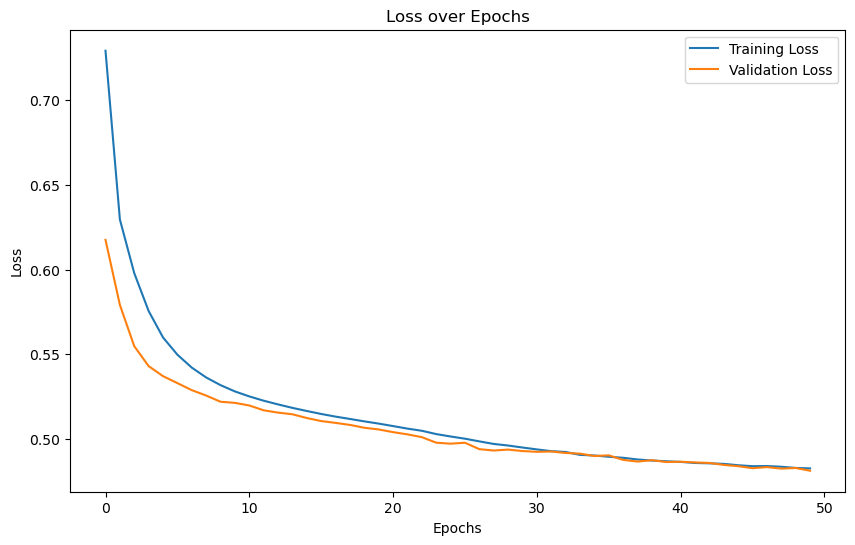

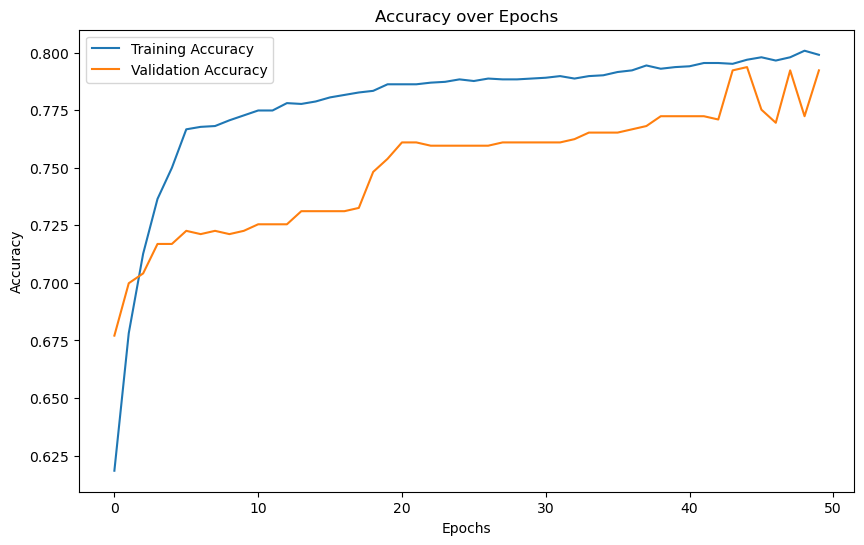

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

In [59]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       554
           1       0.75      0.69      0.72       581
           2       0.70      0.83      0.76       372

    accuracy                           0.79      1507
   macro avg       0.78      0.79      0.78      1507
weighted avg       0.79      0.79      0.79      1507


Confusion Matrix:
 [[474  71   9]
 [ 59 401 121]
 [  0  63 309]]


## 14. BiGRU

In [60]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
X, y = shuffle(X, y, random_state=42)

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

num_classes = len(np.unique(y))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

In [61]:
model = Sequential()
model.add(Bidirectional(GRU(128, activation='relu', return_sequences=False), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/50


C:\Users\hengt\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.5569 - loss: 0.8891 - val_accuracy: 0.6643 - val_loss: 0.6511
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6444 - loss: 0.6663 - val_accuracy: 0.6984 - val_loss: 0.5938
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6746 - loss: 0.6204 - val_accuracy: 0.7098 - val_loss: 0.5695
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7099 - loss: 0.5917 - val_accuracy: 0.7198 - val_loss: 0.5536
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7355 - loss: 0.5701 - val_accuracy: 0.7127 - val_loss: 0.5465
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7481 - loss: 0.5556 - val_accuracy: 0.7141 - val_loss: 0.5419
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7580 - loss: 0.5450 - val_accuracy: 0.7183 - val_loss: 0.5383
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7561 - loss: 0.5370 - val_accuracy: 0.7198 - val_loss: 0.5348
E

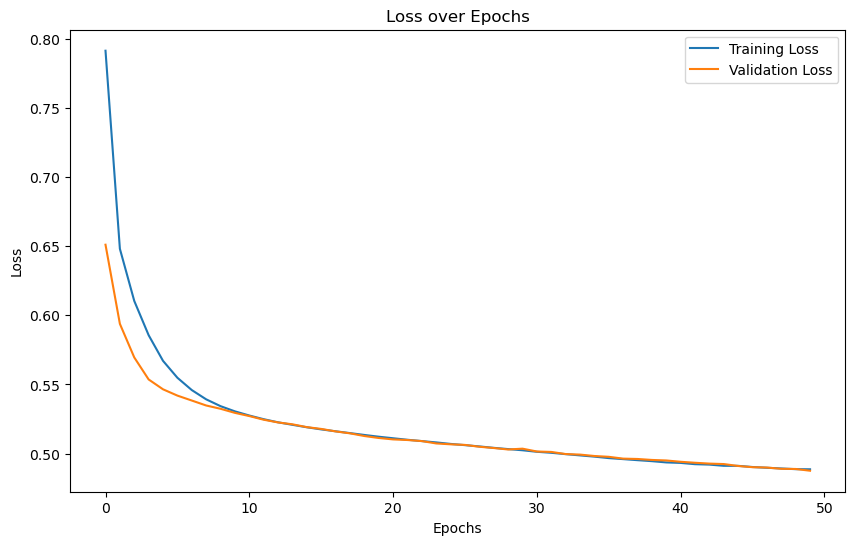

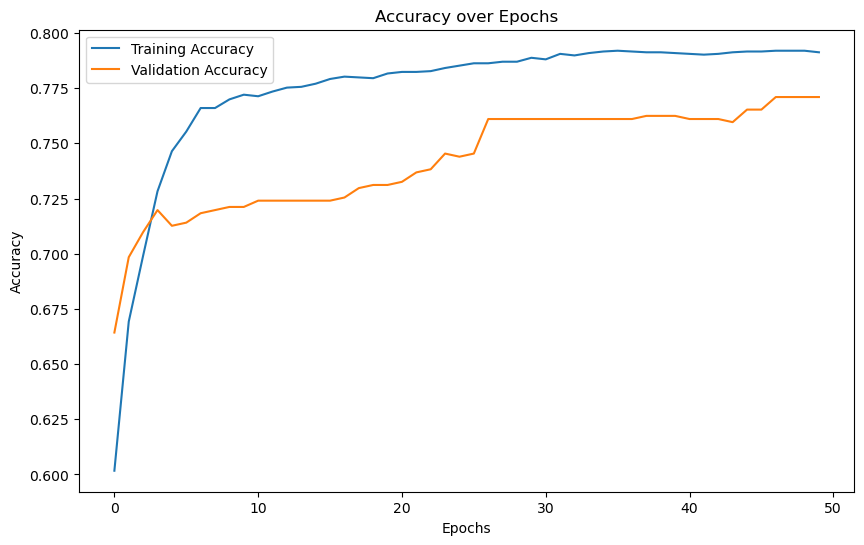

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

In [63]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       554
           1       0.75      0.58      0.66       581
           2       0.63      0.90      0.74       372

    accuracy                           0.76      1507
   macro avg       0.76      0.78      0.75      1507
weighted avg       0.77      0.76      0.75      1507


Confusion Matrix:
 [[467  75  12]
 [ 57 337 187]
 [  0  36 336]]


## 15.  BiLSTM

In [64]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
X, y = shuffle(X, y, random_state=42)

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

num_classes = len(np.unique(y))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

In [65]:
model = Sequential()
model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=False), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%")

C:\Users\hengt\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5621 - loss: 0.8992 - val_accuracy: 0.6615 - val_loss: 0.6771
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6378 - loss: 0.6924 - val_accuracy: 0.6771 - val_loss: 0.6230
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6684 - loss: 0.6464 - val_accuracy: 0.7013 - val_loss: 0.5932
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6838 - loss: 0.6137 - val_accuracy: 0.7084 - val_loss: 0.5743
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7229 - loss: 0.5857 - val_accuracy: 0.7240 - val_loss: 0.5595
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7439 - loss: 0.5647 - val_accuracy: 0.7240 - val_loss: 0.5486
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7528 - loss: 0.5503 - val_accuracy: 0.7255 - val_loss: 0.5414
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7601 - loss: 0.5401 - val_accuracy: 0.7269 - val_loss

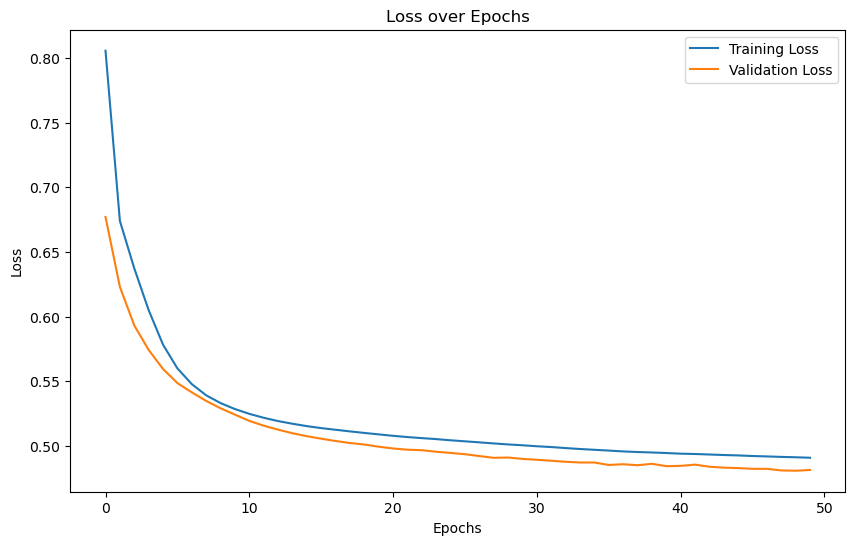

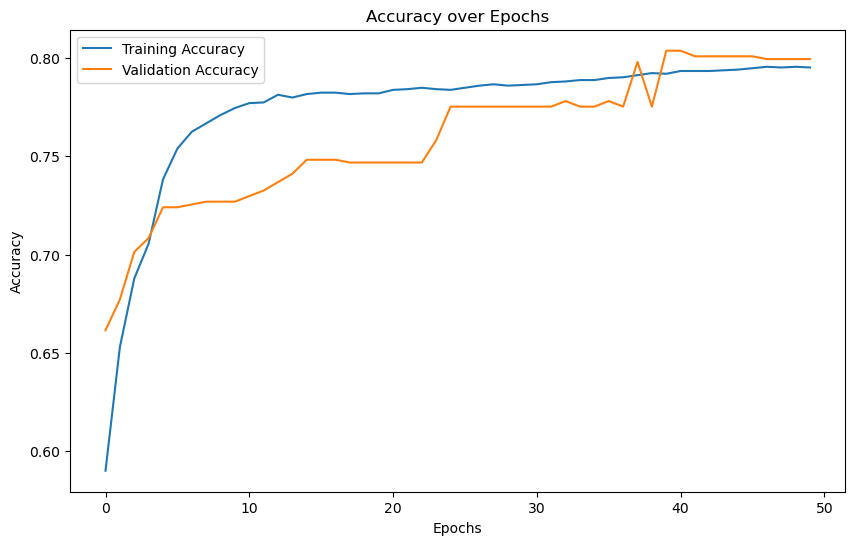

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

In [67]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       554
           1       0.72      0.77      0.74       581
           2       0.75      0.80      0.78       372

    accuracy                           0.79      1507
   macro avg       0.80      0.79      0.79      1507
weighted avg       0.80      0.79      0.79      1507


Confusion Matrix:
 [[452  98   4]
 [ 43 445  93]
 [  0  75 297]]


## 16. CNN

In [68]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
X, y = shuffle(X, y, random_state=42)

X = df[['beds', 'baths', 'size', 'property_type', 'furnishing']]
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

num_classes = len(np.unique(y))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

In [69]:
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

model = Sequential()
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(32, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\hengt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5761 - loss: 0.8706 - val_accuracy: 0.6828 - val_loss: 0.6154
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6497 - loss: 0.6516 - val_accuracy: 0.7098 - val_loss: 0.5596
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7179 - loss: 0.5970 - val_accuracy: 0.7226 - val_loss: 0.5213
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7273 - loss: 0.5729 - val_accuracy: 0.7425 - val_loss: 0.5056
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7450 - loss: 0.5427 - val_accuracy: 0.7383 - val_loss: 0.5080
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7541 - loss: 0.5415 - val_accuracy: 0.7624 - val_loss: 0.4913
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7706 - loss: 0.5261 - val_accuracy: 0.7624 - val_loss: 0.4843
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7727 - loss: 0.5202 - val_accuracy: 0.7653 - val_loss

In [71]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       554
           1       0.75      0.75      0.75       581
           2       0.77      0.78      0.77       372

    accuracy                           0.80      1507
   macro avg       0.80      0.80      0.80      1507
weighted avg       0.80      0.80      0.80      1507


Confusion Matrix:
 [[483  67   4]
 [ 64 433  84]
 [  0  81 291]]


## Performance for Deep Learning Models

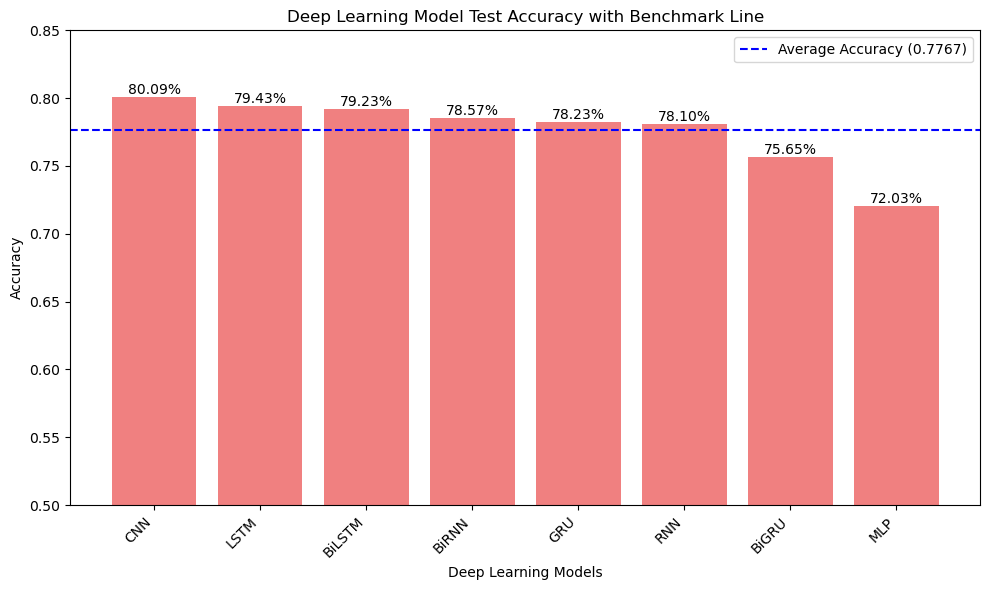

In [72]:
deep_models = [
    ("MLP", 0.7203),
    ("BiRNN", 0.7857),
    ("LSTM", 0.7943),
    ("CNN", 0.8009),
    ("BiGRU", 0.7565),
    ("BiLSTM", 0.7923),
    ("GRU", 0.7823),
    ("RNN", 0.7810),
]

deep_models_sorted = sorted(deep_models, key=lambda x: x[1], reverse=True)
model_names, accuracies = zip(*deep_models_sorted)

average_accuracy = np.mean(accuracies)

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='lightcoral')

for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{accuracy * 100:.2f}%", 
             ha='center', va='bottom', fontsize=10)

plt.axhline(y=average_accuracy, color='blue', linestyle='--', label=f"Average Accuracy ({average_accuracy:.4f})")

plt.ylim(0.5, 0.85)
plt.xlabel("Deep Learning Models")
plt.ylabel("Accuracy")
plt.title("Deep Learning Model Test Accuracy with Benchmark Line")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

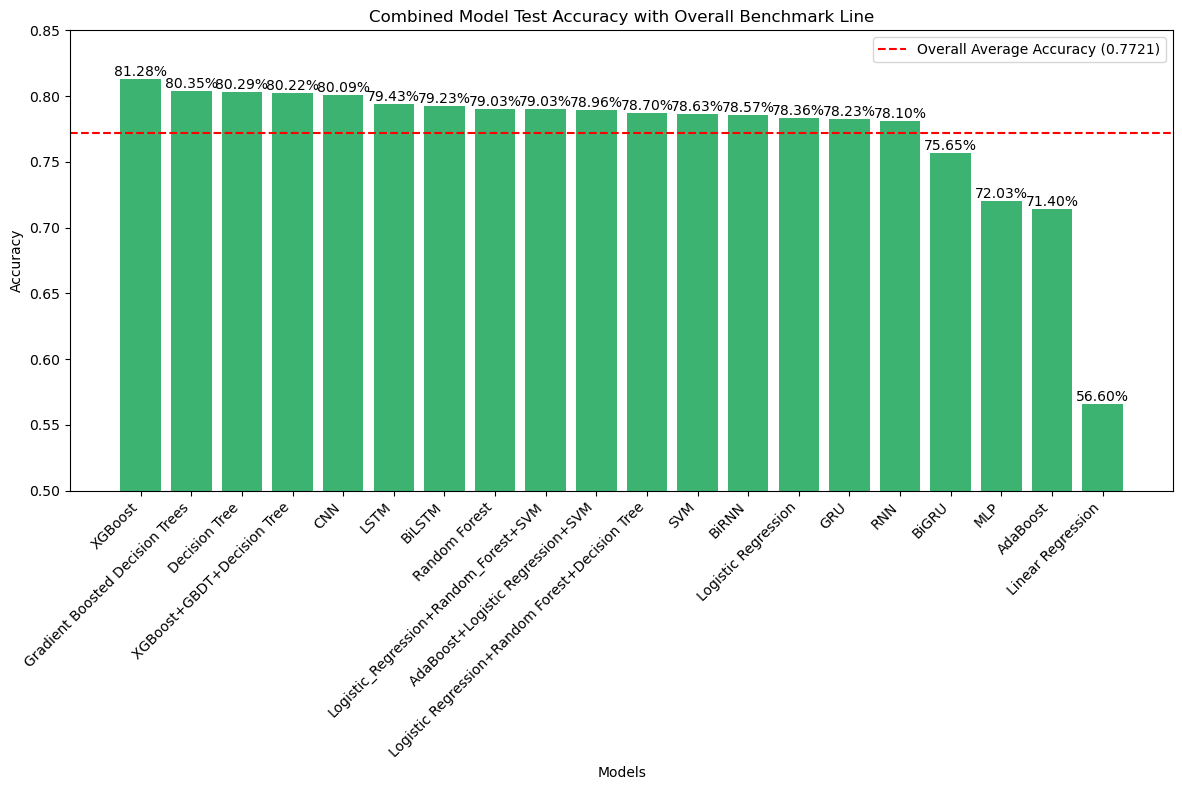

In [73]:
classical_models = [
    ("Linear Regression", 0.5660),
    ("Logistic Regression", 0.7836),
    ("SVM", 0.7863),
    ("Random Forest", 0.7903),
    ("AdaBoost", 0.7140),
    ("Decision Tree", 0.8029),
    ("XGBoost", 0.8128),
    ("Gradient Boosted Decision Trees", 0.8035),
    ("Logistic_Regression+Random_Forest+SVM", 0.7903),
    ("Logistic Regression+Random Forest+Decision Tree", 0.7870),
    ("AdaBoost+Logistic Regression+SVM", 0.7896),
    ("XGBoost+GBDT+Decision Tree", 0.8022),
]

deep_learning_models = [
    ("MLP", 0.7203),
    ("BiRNN", 0.7857),
    ("LSTM", 0.7943),
    ("CNN", 0.8009),
    ("BiGRU", 0.7565),
    ("BiLSTM", 0.7923),
    ("GRU", 0.7823),
    ("RNN", 0.7810),
]

all_models = classical_models + deep_learning_models
all_models_sorted = sorted(all_models, key=lambda x: x[1], reverse=True)
model_names, accuracies = zip(*all_models_sorted)

overall_average_accuracy = np.mean(accuracies)

plt.figure(figsize=(12, 8))
bars = plt.bar(model_names, accuracies, color='mediumseagreen')

for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{accuracy * 100:.2f}%", 
             ha='center', va='bottom', fontsize=10)

plt.axhline(y=overall_average_accuracy, color='red', linestyle='--', label=f"Overall Average Accuracy ({overall_average_accuracy:.4f})")

plt.ylim(0.5, 0.85)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Combined Model Test Accuracy with Overall Benchmark Line")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()